## LABORATORY 04: MACHINE LEARNING II - CLASSIFICATION PROBLEM

#### **Context**

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.

Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).

#### **Detailed Column Descriptions**
1 - **age** (numeric)

2 - **job**: type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

3 - **marital**: marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - **education** (categorical: "unknown","secondary","primary","tertiary")

5 - **default**: has credit in default? (binary: "yes","no")

6 - **balance**: average yearly balance, in euros (numeric)

7 - **housing**: has housing loan? (binary: "yes","no")

8 - **loan**: has personal loan? (binary: "yes","no")

**related with the last contact of the current campaign:**

9 - **contact**: contact communication type (categorical: "unknown","telephone","cellular")

10 - **day**: last contact day of the month (numeric)

11 - **month**: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - **duration**: last contact duration, in seconds (numeric)

**other attributes:**

13 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - **previous**: number of contacts performed before this campaign and for this client (numeric)

16 - **poutcome**: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**

17 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

#### 1. Load the dataset

Import necessary packages for data handling, visualization, and machine learning

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sbn
import scripts

Load the training and test datasets from CSV files, specifying ";" as the separator; display the first 5 rows of the training dataset for verification

In [6]:
dataset = pd.read_csv("train.csv", sep = ";", low_memory = False)
test_set = pd.read_csv("test.csv", sep = ";", low_memory = False)
dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Find common records between the training and test datasets

In [7]:
common_records = pd.merge(dataset, test_set, how='inner')
print(f"Amount of train records: {len(dataset)}")
print(f"Amount of test records: {len(test_set)}")
print(f"Amount of common records: {len(common_records)}")

Amount of train records: 45211
Amount of test records: 4521
Amount of common records: 4521


Mark common records between the training and test sets; Keep only records that are not present in the test set; Check for common records after filtering

In [8]:
# Mark common records between the training and test sets
merged = pd.merge(dataset, test_set, on=list(dataset.columns), how='left', indicator=True)

# Keep only records that are not present in the test set
dataset = merged[merged['_merge'] == 'left_only'].drop('_merge', axis=1)

# Check for common records after filtering
common_records = pd.merge(dataset, test_set, how='inner')
print(f"Amount of train records: {len(dataset)}")
print(f"Amount of test records: {len(test_set)}")
print(f"Amount of common records: {len(common_records)}")


Amount of train records: 40690
Amount of test records: 4521
Amount of common records: 0


Display the number of features (columns) in the training and test datasets

In [9]:
print("#Train-features = ", dataset.shape[1])
print("#Test-features = ", test_set.shape[1])

#Train-features =  17
#Test-features =  17


Import the custom DataPreprocessing class from the scripts.preprocess module; Instantiate the preprocessor; Get metadata, numerical columns, and categorical columns from the dataset; Print metadata and the list of numerical and categorical features;

In [10]:
from scripts.preprocess import DataPreprocessing

dp = DataPreprocessing()
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 17 
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Numerical features: 
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical features: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


#### 2. Data Cleaning

# Data Cleaning and Outlier Handling
In this section, we will perform data cleaning by checking for missing values and handling outliers in the dataset.


The filter_missing method from the DataPreprocessing class helps to visualize the missing data count for each feature

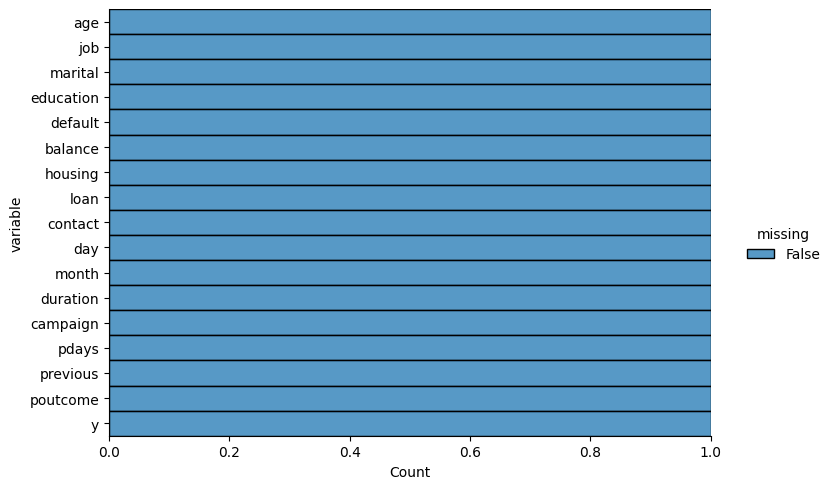

In [11]:
dp.filter_missing(dataset)

Display the 'age' column to observe the data distribution for potential outlier analysis

In [12]:
dataset["age"]

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 40690, dtype: int64

# Clean Outliers
Outliers can skew the model's performance and should be addressed. In this step, we will clean the 'age' column by capping the maximum age at 65.


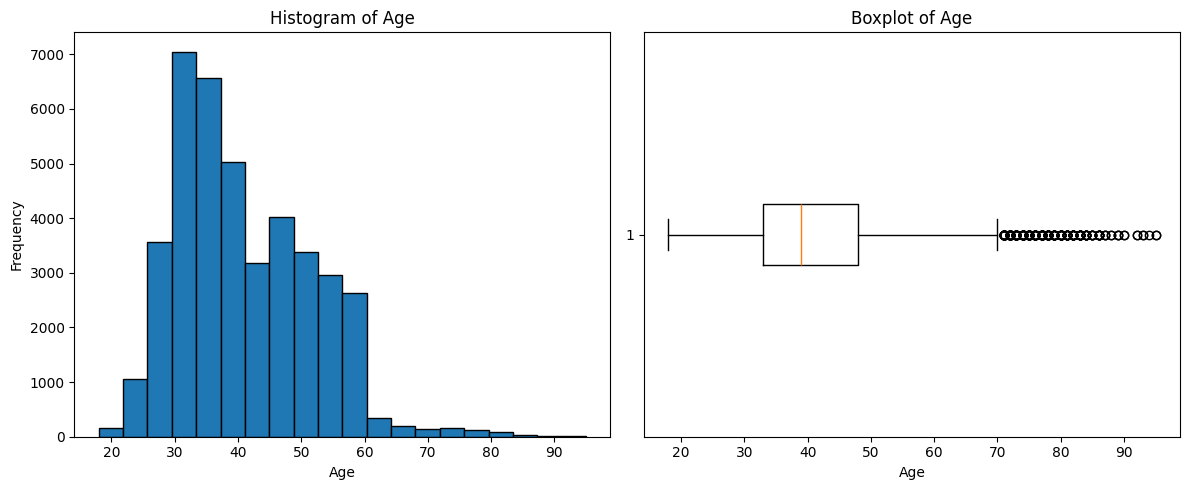

In [14]:
# Plot histogram and boxplot to visualize the distribution of the 'age' column
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(dataset['age'], bins=20, edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(dataset['age'], vert=False)
plt.title('Boxplot of Age')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

# Capping Age Values
To handle potential outliers in the 'age' column, we cap the maximum age at 65. This ensures that extreme values do not skew the analysis or model performance. By limiting the age values to 65, we reduce the impact of potential outliers while retaining the majority of the data distribution.

In [15]:
dataset.loc[dataset["age"] > 65, "age"] = 65

In [16]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [17]:
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [18]:
dataset["age"].head(15)

0     58
1     44
2     33
3     47
4     33
5     35
6     28
8     58
10    41
11    29
12    53
13    58
15    51
16    45
17    57
Name: age, dtype: int64

In [19]:
dataset["day"].head(15)

0     5
1     5
2     5
3     5
4     5
5     5
6     5
8     5
10    5
11    5
12    5
13    5
15    5
16    5
17    5
Name: day, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def clean_data(dataset):

    Q1 = dataset['balance'].quantile(0.25)
    Q3 = dataset['balance'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataset = dataset[(dataset['balance'] >= lower_bound) & (dataset['balance'] <= upper_bound)]

    dataset = dataset.drop(columns=['contact', 'day', 'month'], axis=1)

    dataset = dataset.drop_duplicates()

    return dataset

    dataset[column] = dataset[column].fillna(dataset[column].median())


Cleaned dataset

In [23]:
dataset = clean_data(dataset)
dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,no


Redefine metadata

In [24]:
metadata, num_cols, cat_cols = dp.get_metadata(dataset)

print(f"Metadata ==> total: {len(metadata)} \n", metadata)
print("Numerical features: \n", num_cols)
print("Categorical features: \n", cat_cols)

Metadata ==> total: 14 
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')
Numerical features: 
 ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
Categorical features: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']


#### 3. Exploratory Data Analysis

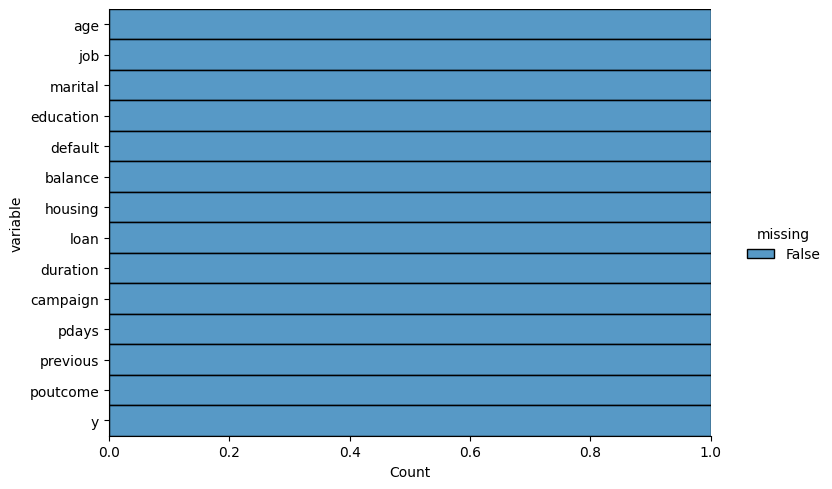

0


In [25]:
# filter missing values
dp.filter_missing(dataset)
print(dataset.isnull().sum().sum())

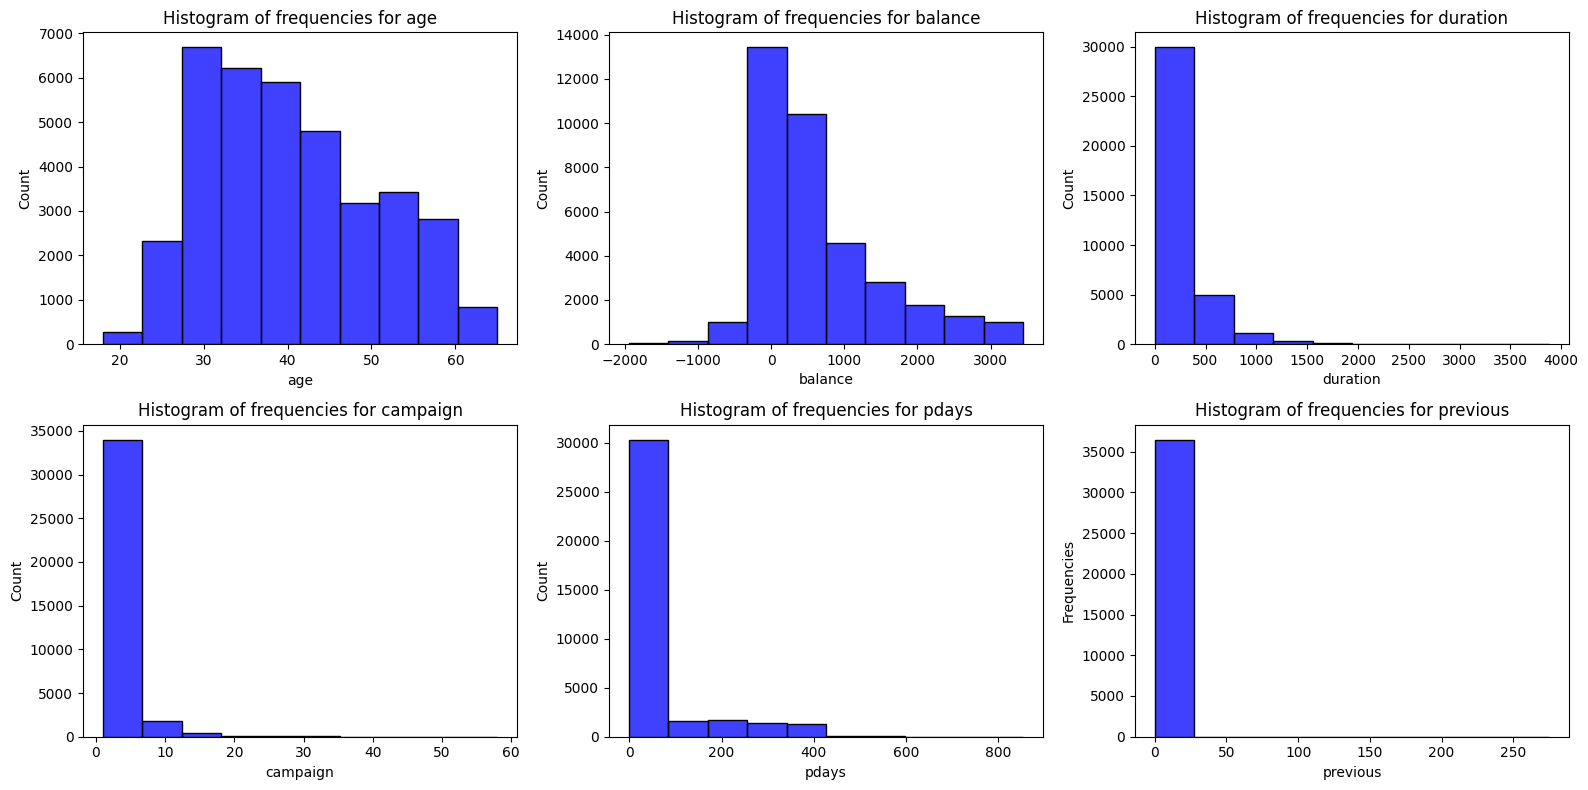

In [26]:
# plot the histogram of frequencies for numerical features
dp.hist_frequencies(dataset, num_cols, bins = 10)

In [28]:
# check the behavior of categorical features
dp.get_categorical_instances(dataset, cat_cols)


***** job ******
job
blue-collar      8077
management       7305
technician       6166
admin.           4298
services         3466
retired          1726
self-employed    1229
entrepreneur     1186
unemployed       1033
housemaid        1005
student           766
unknown           216
Name: count, dtype: int64

***** marital ******
marital
married     21730
single      10473
divorced     4270
Name: count, dtype: int64

***** education ******
education
secondary    19123
tertiary     10313
primary       5561
unknown       1476
Name: count, dtype: int64

***** default ******
default
no     35744
yes      729
Name: count, dtype: int64

***** housing ******
housing
yes    20553
no     15920
Name: count, dtype: int64

***** loan ******
loan
no     30260
yes     6213
Name: count, dtype: int64

***** poutcome ******
poutcome
unknown    29921
failure     3909
other       1463
success     1180
Name: count, dtype: int64

***** y ******
y
no     32398
yes     4075
Name: count, dtype: int64


iteratively pie chart

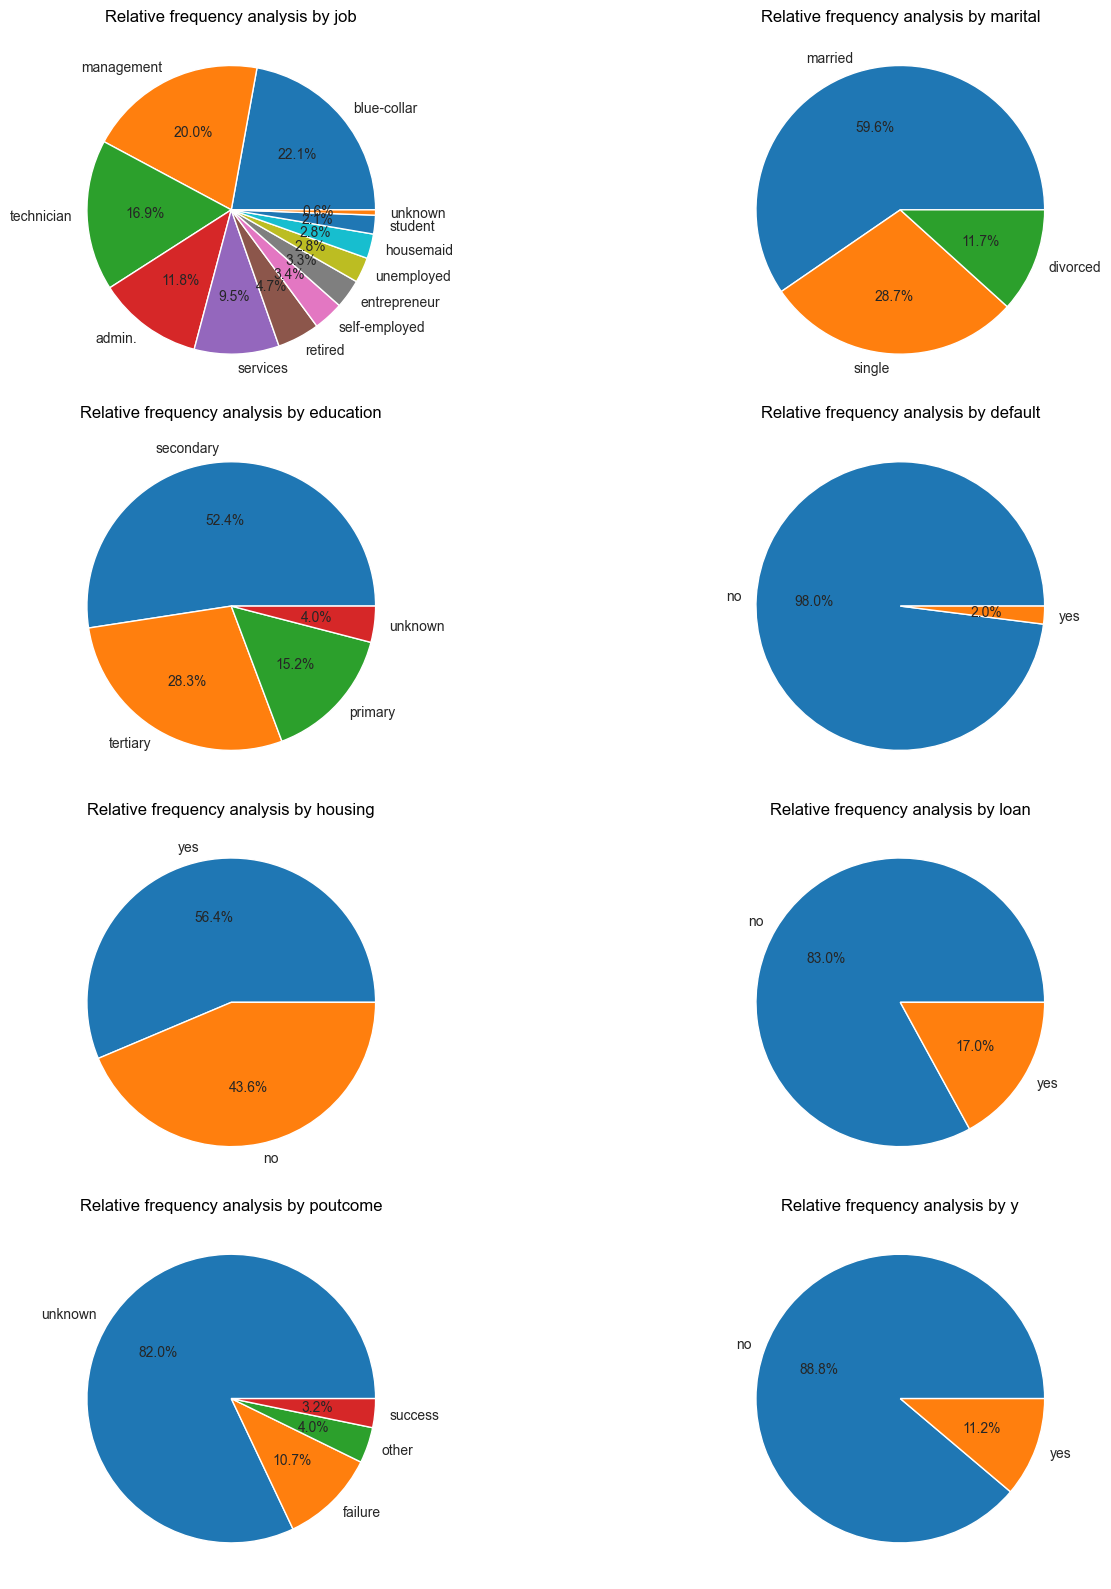

In [29]:

dp.iter_piechart(dataset, cat_cols)

#### 4. Data preprocessing

In [30]:
# split independent and dependent variables
x = dataset.loc[:, dataset.columns != "y"]
y = dataset["y"]

In [31]:
x.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown


In [32]:
print("Dimension of features = ", x.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (36473, 13)
Dimension of target =  (36473,)


Split train and test set

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (29178, 13)
Y-train:  29178
X-test dim:  (7295, 13)
Y-test:  7295


In [34]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder

transformer = make_column_transformer(
    (StandardScaler(), ["age", "balance", "duration", "campaign", "pdays", "previous"]),

    (RobustScaler(), ["balance", "campaign", "duration", "pdays"]),

    (OneHotEncoder(handle_unknown="ignore"), ["job", "marital", "education", "default",
                                               "housing", "loan", "poutcome"])
)

In [35]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'balance', 'duration', 'campaign',
                                  'pdays', 'previous']),
                                ('robustscaler', RobustScaler(),
                                 ['balance', 'campaign', 'duration', 'pdays']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'poutcome'])])

In [36]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [37]:
x_train

array([[-0.73911274, -0.56169877, -0.14607251, ...,  0.        ,
         0.        ,  1.        ],
       [-1.53234602, -0.37759909,  1.15846809, ...,  0.        ,
         0.        ,  1.        ],
       [-0.93742106,  1.62255479, -0.54413474, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.8382669 , -0.50825048,  0.20863642, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.1532747 ,  1.66056247,  0.01551711, ...,  0.        ,
         0.        ,  1.        ],
       [-1.43319186, -1.01779087,  0.22046005, ...,  0.        ,
         0.        ,  1.        ]])

In [38]:
y_train

5234     no
39199    no
25802    no
16368    no
3586     no
         ..
25313    no
39472    no
37437    no
26042    no
3177     no
Name: y, Length: 29178, dtype: object

In [39]:
classes = np.unique(y)
print("Avalilable classes: ", classes)

Avalilable classes:  ['no' 'yes']


#### 5. Building Models

In [40]:
%reload_ext autoreload
%autoreload 2

KNN Classifier

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time

class KNNModel:
    def __init__(self):
        # Define a smaller range of hyperparameters for faster tuning
        self.params = {
            'n_neighbors': [3, 5, 7],  # Limit the number of neighbors
            'weights': ['uniform', 'distance'],  # Fewer combinations for weights
            'metric': ['euclidean', 'manhattan']  # Only two distance metrics
        }
    
    def train(self, x_train, y_train):
        # Initialize the K-Nearest Neighbors classifier
        model = KNeighborsClassifier()
        
        # Reduce the number of folds in cross-validation for faster results
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=self.params,
            scoring="accuracy",
            cv=3,  # Use fewer folds than default to speed up cross-validation
            n_jobs=-1  # Use all available CPU cores
        )
        
        # Start the grid search to find the best hyperparameters
        grid_search.fit(x_train, y_train)
        
        # Retrieve the best model based on cross-validation accuracy
        best_model = grid_search.best_estimator_
        return best_model

# Record the start time of training
start_time = time.time()

# Initialize and train the KNN model
knn = KNNModel()
knn_model = knn.train(x_train, y_train)

# Calculate and display the time taken for training
end_time = time.time()
training_time = end_time - start_time
print(f"Time of training KNN: {training_time:.3f} seconds")



Time of training KNN: 23.096 seconds


c:\Users\User\PycharmProjects\pythonProject12\venv\lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.88556447 0.88381657 0.89142505 0.89063678 0.89344712 0.89211049
        nan 0.88662691        nan 0.89070533        nan 0.89468092]
  warnings.warn(


In [47]:
knn_model

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

MAKE PREDICTIONS

In [48]:

print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", knn_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", knn_model.predict(x_test[0:10]))

real values in train:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']
predicted values in train:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']
real values in test:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
predicted values in test:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']


In [49]:
import os

if not os.path.exists("models"):
    os.makedirs("models")

Deploy knn model

In [78]:

from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="knn_v1.pkl", model=knn_model)

Evaluate knn model

In [51]:

from scripts.evaluator import EvalClassifier
rec_knn = DeployClassifier(path = "models").load_model(filename="knn_v1.pkl")
eval_knn = EvalClassifier(model = rec_knn)

Get confusion matrix in training

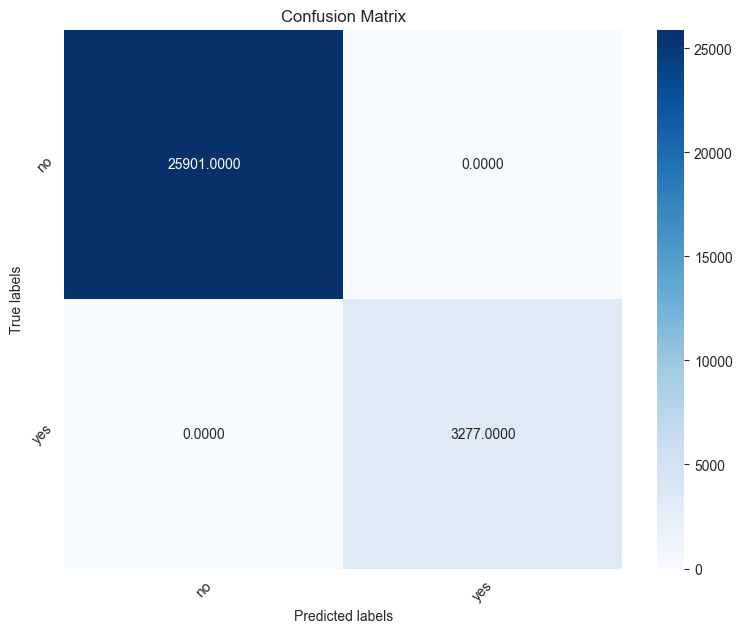

In [52]:

y_pred = rec_knn.predict(x_train)
cmknn_train = eval_knn.get_confusion_matrix(y_train.values, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_train, classes)

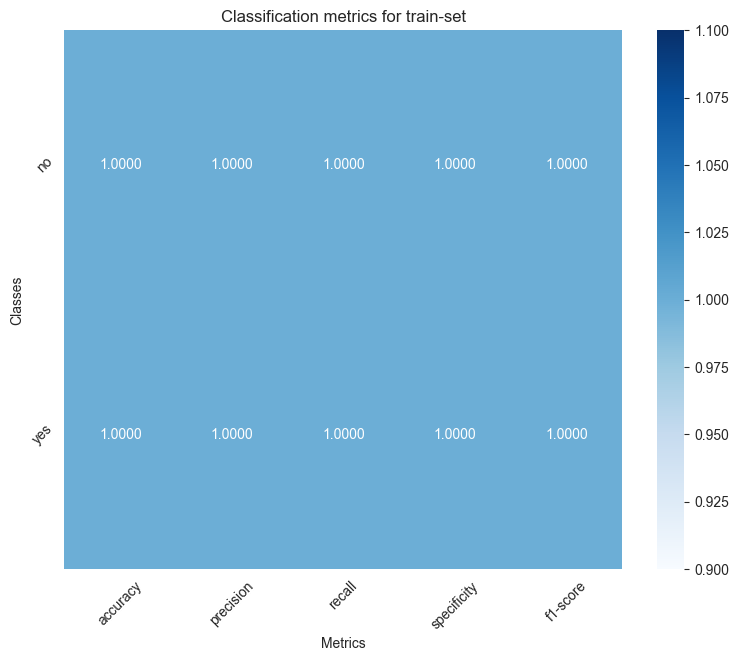

In [53]:
metrics_train_knn = eval_knn.calculate_metrics_by_class(cmknn_train, classes)
eval_knn.plot_metrics_by_class(metrics_train_knn, "Classification metrics for train-set")

Get confusion matrix in testing

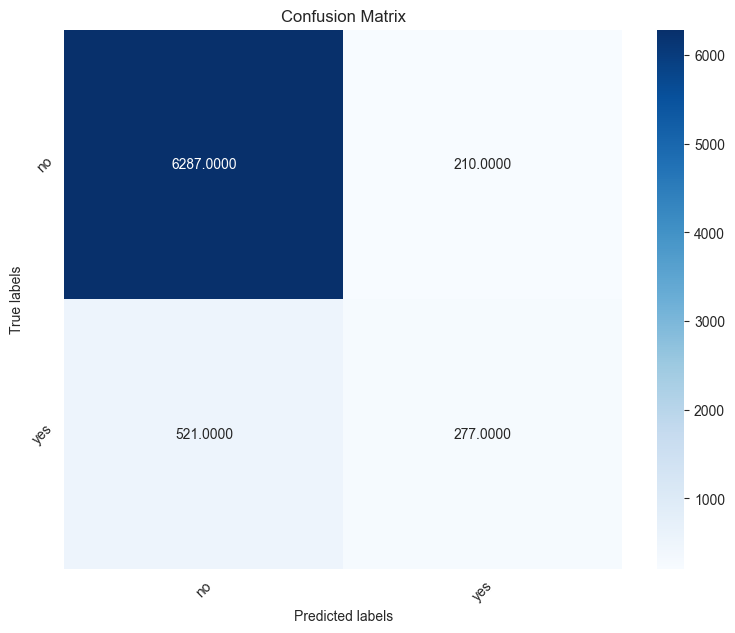

In [54]:

y_pred = rec_knn.predict(x_test)
cmknn_test = eval_knn.get_confusion_matrix(y_test, y_pred, classes)
eval_knn.plot_confusion_matrix(cmknn_test, classes)

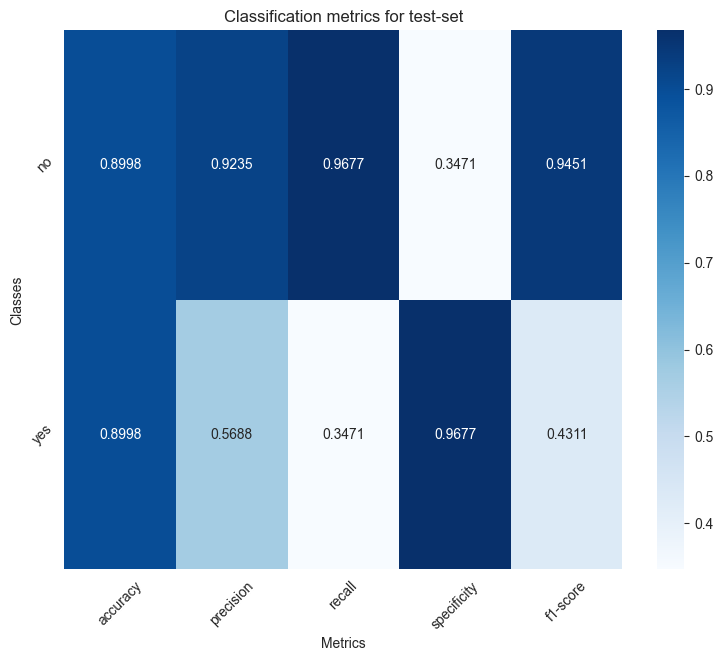

In [58]:
metrics_test_knn = eval_knn.calculate_metrics_by_class(cmknn_test, classes)
eval_knn.plot_metrics_by_class(metrics_test_knn, "Classification metrics for test-set")

In [79]:
# calculate the metrics for whole test set
eval_knn.calculate_metrics_xall(cmknn_test, metrics_test_knn)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.899794,0.74613,0.657398,0.657398,0.688093


SVM Classifier

LinearSVC is used for linear classification problems because it is efficient, especially for large datasets. It works well when the data is linearly separable by finding the optimal hyperplane that maximizes the margin between classes. Additionally, it provides regularization through the parameter C and is faster and more scalable compared to the traditional SVC method.

In [67]:
from scripts.classifiers import SVMModel  # Import custom SVM model
import time
from sklearn.svm import LinearSVC  # Import LinearSVC from sklearn

# Record the start time of training
start_time_svm = time.time()

svm = LinearSVC()  
svm_model = svm.fit(x_train, y_train)

# Calculate and display the time taken for training
end_time_svm = time.time()
training_time_svm = end_time_svm - start_time_svm
print(f"Time of training SVM: {training_time_svm:.3f} seconds")


Time of training SVM: 0.408 seconds


In [68]:
svm_model

LinearSVC()

Make predictions

In [69]:

print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", svm_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", svm_model.predict(x_test[0:10]))

real values in train:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']
predicted values in train:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
real values in test:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
predicted values in test:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']


Deploy svm model

In [70]:

from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="svm_v1.pkl", model=svm_model)

Evaluate svm model

In [71]:

from scripts.evaluator import EvalClassifier
rec_svm = DeployClassifier(path = "models").load_model(filename="svm_v1.pkl")
eval_svm = EvalClassifier(model = rec_svm)

Get confusion matrix in training

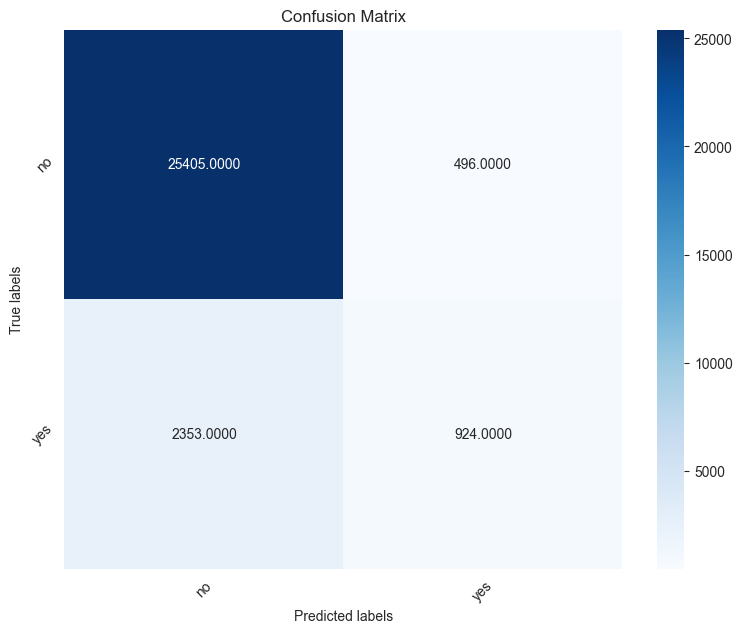

In [72]:

y_pred = rec_svm.predict(x_train)
cmsvm_train = eval_svm.get_confusion_matrix(y_train.values, y_pred, classes)
eval_svm.plot_confusion_matrix(cmsvm_train, classes)

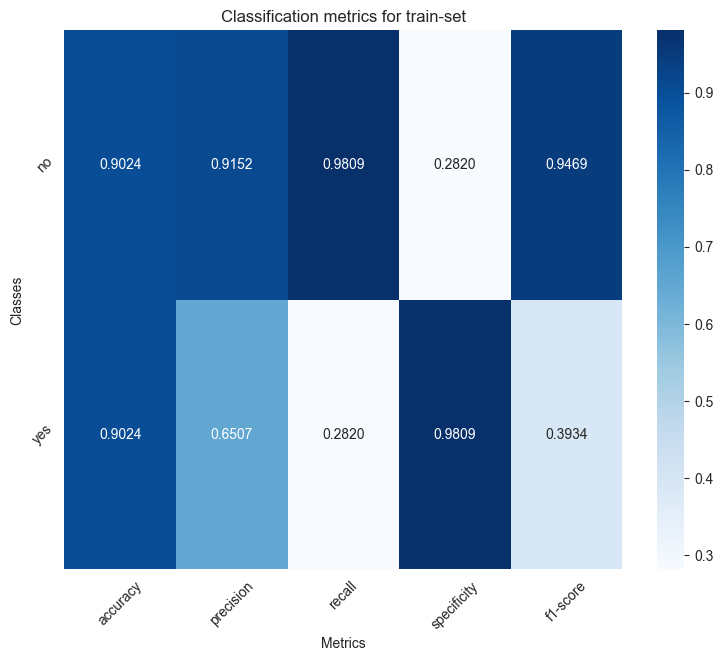

In [73]:
metrics_train_svm = eval_svm.calculate_metrics_by_class(cmsvm_train, classes)
eval_svm.plot_metrics_by_class(metrics_train_svm, "Classification metrics for train-set")

Get confusion matrix in testing

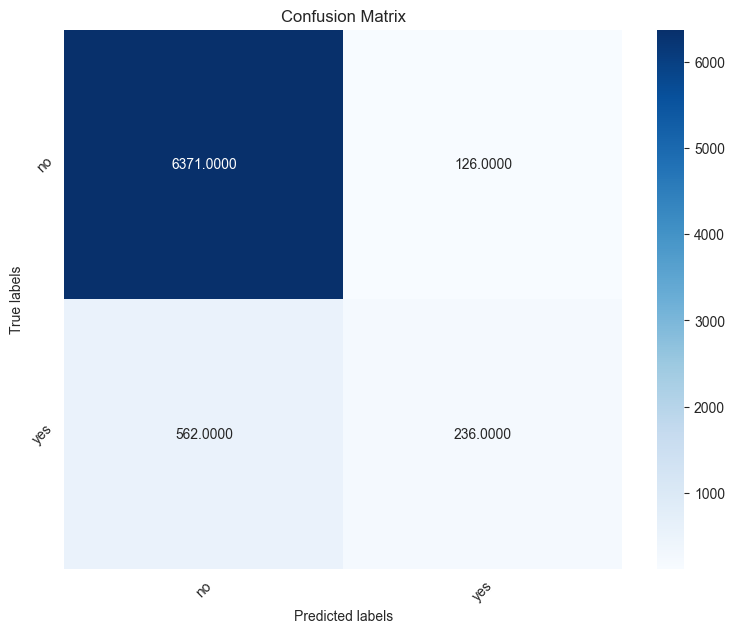

In [74]:

classes = np.unique(y) 
y_pred = rec_svm.predict(x_test)
cmsvm_test = eval_svm.get_confusion_matrix(y_test, y_pred, classes)  
eval_svm.plot_confusion_matrix(cmsvm_test, classes)


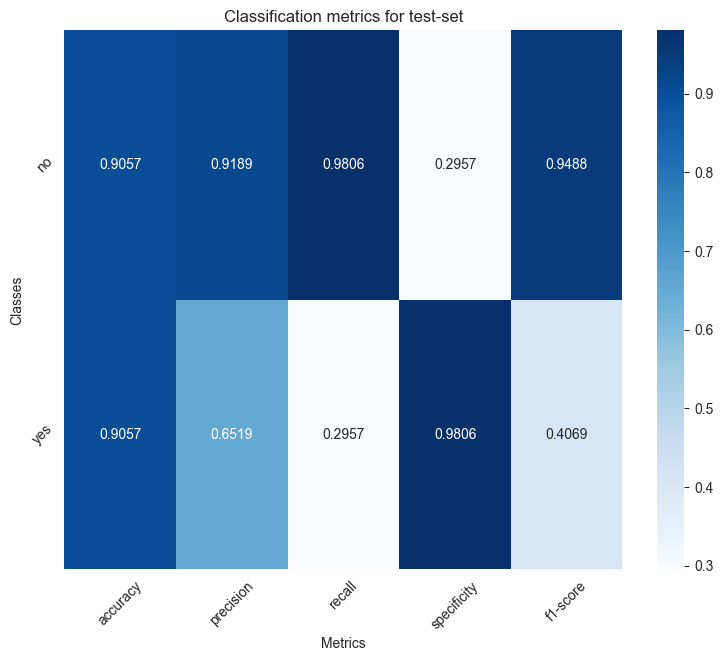

In [75]:
metrics_test_svm = eval_svm.calculate_metrics_by_class(cmsvm_test, classes)
eval_svm.plot_metrics_by_class(metrics_test_svm, "Classification metrics for test-set")

Calculate the metrics for whole test set

In [76]:

eval_svm.calculate_metrics_xall(cmsvm_test, metrics_test_svm)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.905689,0.785436,0.638173,0.638173,0.677834


# Random Forest Classifier

The Random Forest Classifier is a powerful machine learning algorithm used for classification tasks. It builds multiple decision trees and combines their results to make a final prediction. Each tree is trained on a random subset of the data, which helps reduce overfitting and improves generalization. Random Forest is known for its robustness, accuracy, and ability

In [77]:
from scripts.classifiers import RandomForestModel
import time

# train model
sttrain_rf = time.time()
rf = RandomForestModel()
rf_model = rf.train(x_train, y_train)

# calculate time
ettrain_rf = time.time()
ttrain_rf = ettrain_rf - sttrain_rf
print(f"Time of training Random Forest: {ttrain_rf:.3f} seconds")

Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 40}
Time of training Random Forest: 102.621 seconds


In [80]:
rf_model

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=40)

Make predictions

In [81]:
# make predictions
print("real values in train: ", y_train[0:10].values)
print("predicted values in train: ", rf_model.predict(x_train[0:10]))
print("real values in test: ", y_test[0:10].values)
print("predicted values in test: ", rf_model.predict(x_test[0:10]))

real values in train:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no']
predicted values in train:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
real values in test:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']
predicted values in test:  ['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no']


Deploy rf model

In [79]:

from scripts.deploy import DeployClassifier
DeployClassifier(path="models").save_model(filename="rf_v1.pkl", model=rf_model)

Evaluate rf model

In [81]:

from scripts.evaluator import EvalClassifier
rec_rf = DeployClassifier(path = "models").load_model(filename="rf_v1.pkl")
eval_rf = EvalClassifier(model = rec_rf)

Get confusion matrix in training

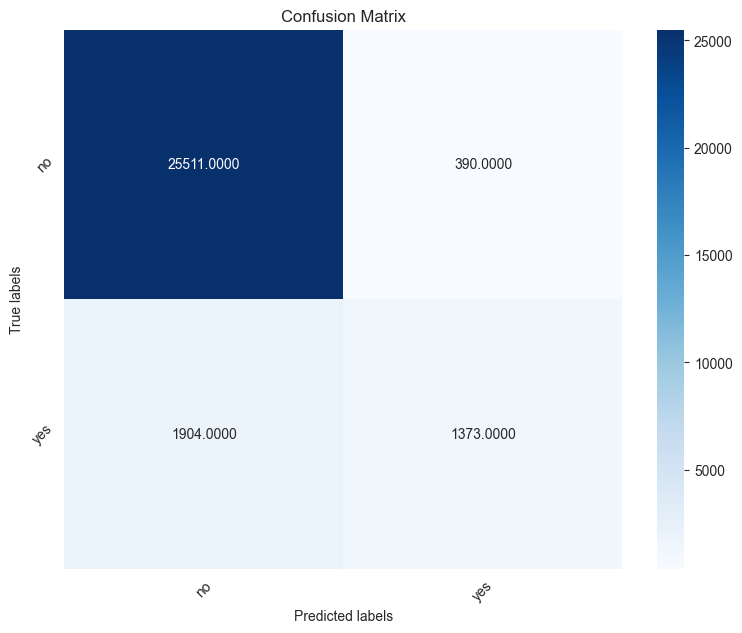

In [82]:

y_pred = rec_rf.predict(x_train)
cmrf_train = eval_rf.get_confusion_matrix(y_train.values, y_pred, classes)
eval_rf.plot_confusion_matrix(cmrf_train, classes)

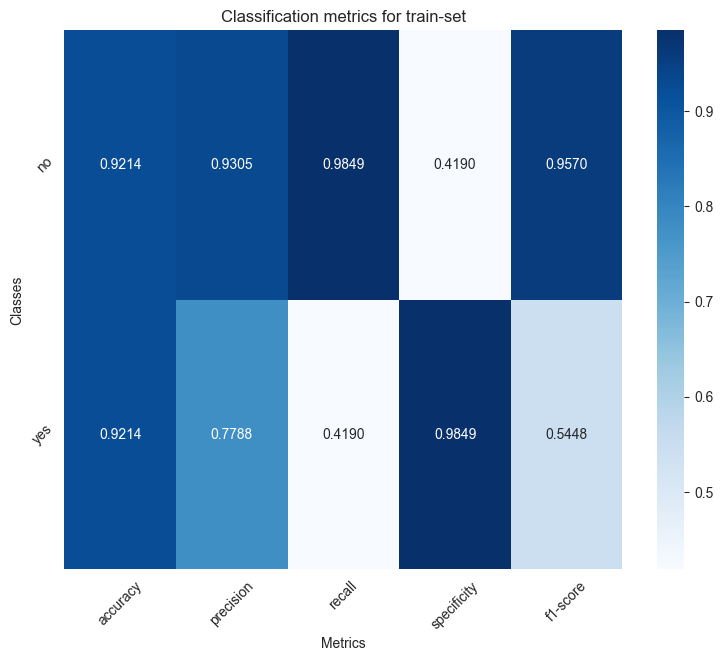

In [83]:
metrics_train_rf = eval_knn.calculate_metrics_by_class(cmrf_train, classes)
eval_rf.plot_metrics_by_class(metrics_train_rf, "Classification metrics for train-set")

Get confusion matrix in testing

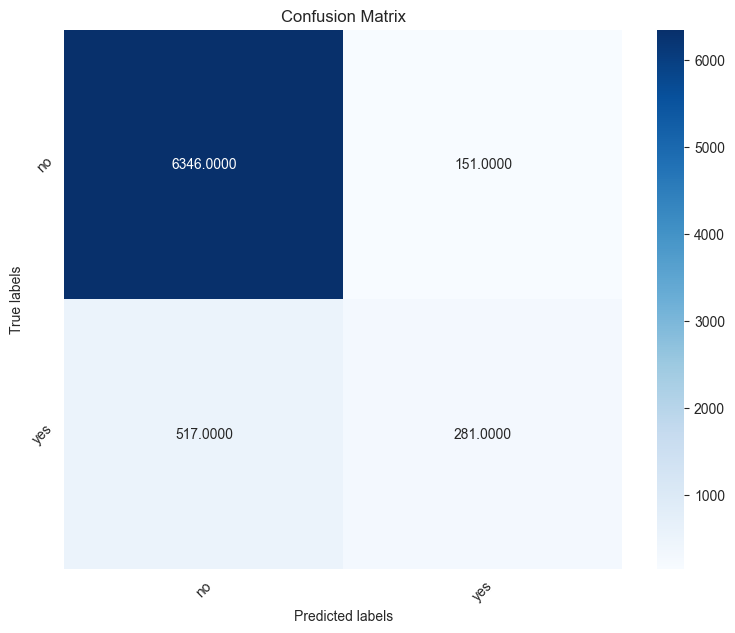

In [86]:

classes = np.unique(y)
y_pred = rec_rf.predict(x_test)
cmrf_test = eval_rf.get_confusion_matrix(y_test, y_pred,classes)
eval_rf.plot_confusion_matrix(cmrf_test, classes)

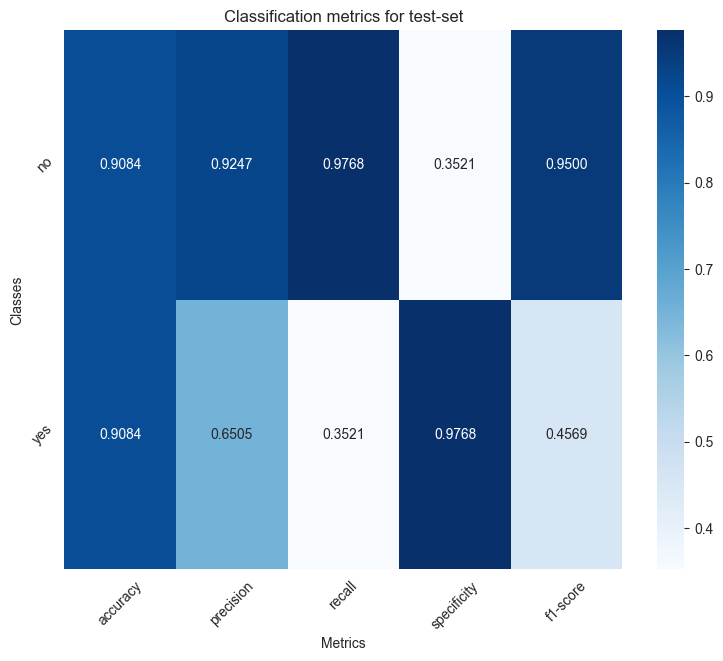

In [87]:
metrics_test_rf = eval_rf.calculate_metrics_by_class(cmrf_test, classes)
eval_rf.plot_metrics_by_class(metrics_test_rf, "Classification metrics for test-set")

Calculate the metrics for whole test set

In [88]:

eval_rf.calculate_metrics_xall(cmrf_test, metrics_test_rf)

,accuracy,precision,recall,specificity,f1-score
Mean-metrics,0.90843,0.787566,0.664444,0.664444,0.703455


# Conclusion

In this project, we focused on a classification task using a dataset with both numerical and categorical features. We applied a full supervised learning pipeline, selecting three algorithms—K-Nearest Neighbors (KNN), Random Forest, and Linear SVC — to evaluate their performance. After preprocessing the data, we trained the models and compared their accuracy, precision, and recall.